In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import csv
reader = csv.reader(open("hepatitis_2_csv.csv", "r"))
x = list(reader)
res = np.array(x).astype("float")

In [3]:
training_class_name=res[0:568,19:20];
training_data=res[0:568,0:19];
training_data=np.matrix(training_data)
training_class_name=np.matrix(training_class_name)

In [4]:
meanData=training_data.mean()
varianceData=np.var(training_data)
training_data=(training_data-meanData)/varianceData

In [5]:
class Unit:
    
    def __init__(self,activation):
        # self.activation="sigmoid"
        self.activation=activation
        print("Activation set as {}".format(self.activation))
        
    def sigmoid(self,X):
        return 1/(1+np.exp(-X));
  
    def tanh(self,X):
        return np.tanh(X);

    def relu(self,X):
        return np.maximum(0, X);
        
    def getActivation(self):
        # plot the activation function using matplotlib library
        cur_axes = plt.gca()
        # to remove the x axis
        cur_axes.axes.get_xaxis().set_visible(False)
        rangex=np.linspace(-10, 10, 100)
        
        if(self.activation=="sigmoid"):
            plt.plot(rangex,self.sigmoid(rangex))
        elif(self.activation=="tanh"):
            plt.plot(rangex,self.tanh(rangex))
        elif(self.activation=="relu"):
            plt.plot(rangex,self.relu(rangex))
        plt.title("activation function = "+self.activation)
        
    def train(self,epochs,inputmatrix,outputmatrix):
        self.weights=np.random.rand(inputmatrix.shape[1],1)
        self.trainingOutput=[]
        self.correctOutput=[]
        self.epochs=np.asmatrix(np.arange(0,epochs,1))
        for i in range(0,epochs):
            val=self.output(inputmatrix,outputmatrix,i)
            if(self.activation=="sigmoid"):
                val=val>=0.499
            elif(self.activation=="tanh" or self.activation=="relu"):
                val=val>=0
                    
            self.trainingOutput.append(val)
            self.correctOutput.append(outputmatrix)
            
        self.trainingOutput=np.asarray(self.trainingOutput)
        self.correctOutput=np.asarray(self.correctOutput)
            
    def output(self,inputmatrix,outputmatrix,iterno):
        self.ipv=np.dot(inputmatrix,self.weights)
        if(self.activation=="sigmoid"):
            self.result=self.sigmoid(self.ipv)
        elif(self.activation=="tanh"):
            self.result=self.tanh(self.ipv)
        elif(self.activation=="relu"):
            self.result=self.relu(self.ipv)
        cost=self.costfunc(inputmatrix,outputmatrix)
        print("cost for {} iteration is {}".format(iterno,cost))
        self.optimization(0.1,inputmatrix,outputmatrix)
        return self.result
        
    def costfunc(self,inputmatrix,outputmatrix):
        A1=np.multiply(outputmatrix,np.log(self.result))
        A2=np.multiply((1-outputmatrix),np.log((1-self.result)))
        cost=A1+A2
        cost=(-1/len(inputmatrix))*cost
        cost=np.sum(cost)
        return cost
    
    def optimization(self,learningRate,inputmatrix,outputmatrix):
        delta=(learningRate/len(self.weights))*np.dot(inputmatrix.transpose(),self.result-outputmatrix)
        self.weights=self.weights-delta
                                    
    def parameters(self):
        parameters={"weights":self.weights,"activation":self.activation}
        print("Weights = {}".format(parameters["weights"]))
        print("activation = {}".format(parameters["activation"]))
        return parameters
    
    def predict(self,inp):
        self.intake=np.dot(inp,self.weights)
        if(self.activation=="sigmoid"):
            self.out=self.sigmoid(self.intake)
        elif(self.activation=="tanh"):
            self.out=self.tanh(self.intake)
        elif(self.activation=="relu"):
            self.out=self.relu(self.intake)
        return self.out
    
    def results(self):
        ac=self.correctOutput - self.trainingOutput
        accuracy=np.sum(ac,axis=1)
        accuracy=accuracy/len(accuracy)
        plt.plot(self.epochs.T,accuracy)
        plt.title("Training Accuracy")
        plt.xlabel("epochs")
        plt.ylabel("Accuracy")
        #print(accuracy.shape)
        
    @classmethod
    def info(cls):
        print("This is a neural network unit which takes the output of previous unit and corresponding weights.\n It takes the product of both and is passes on to the activation function to get the output")
        
    

In [6]:
u1=Unit(activation="sigmoid")

Activation set as sigmoid


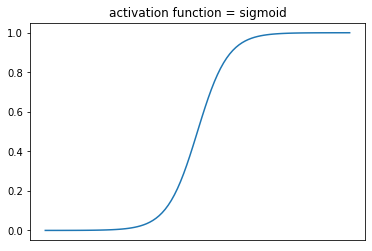

In [7]:
u1.getActivation()

In [11]:
u1.train(10,training_data,training_class_name)

cost for 0 iteration is 0.6811284150386613
cost for 1 iteration is 0.6789391736789725
cost for 2 iteration is 0.6767809120900685
cost for 3 iteration is 0.6746531592665928
cost for 4 iteration is 0.672555450071488
cost for 5 iteration is 0.6704873252563404
cost for 6 iteration is 0.6684483314760628
cost for 7 iteration is 0.666438021298152
cost for 8 iteration is 0.6644559532067624
cost for 9 iteration is 0.6625016916018271


[[ -6.8]
 [ -8. ]
 [ -9.6]
 [ -9.6]
 [ -9.6]
 [-10. ]
 [-10. ]
 [-10.4]
 [-10.4]
 [-10.4]]


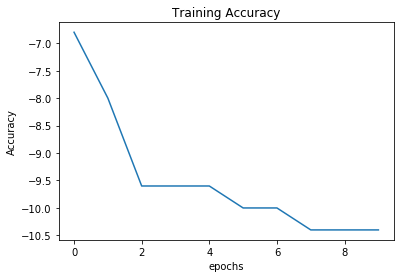

In [12]:
params=u1.results()

In [13]:
output=u1.predict(np.asarray([39,0,0,1,1,1,0,1,1,0,0,0,0,2.3,280,98,3.8,40,0]))
print(output)

[[1.]]


In [14]:
res=u1.parameters()

Weights = [[0.22901248]
 [0.11840717]
 [0.02419174]
 [0.0905803 ]
 [0.18106277]
 [0.23657748]
 [0.1788707 ]
 [0.63317053]
 [0.84047093]
 [0.5348659 ]
 [0.74218908]
 [0.49101498]
 [0.0975878 ]
 [0.17698653]
 [1.40700468]
 [0.64845572]
 [0.20879824]
 [1.31769124]
 [0.05570172]]
activation = sigmoid


In [127]:

class Layers:
    def __init__(self):
        pass
    class Deep:
        def __init__(self,numberOfUnits,otherdata):
            

SyntaxError: unexpected EOF while parsing (<ipython-input-127-4e99675331ea>, line 6)

In [94]:
True-0

1